In [2]:
#from call_functions import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets

In [2]:
Nx = 2**4
L = 2*np.pi
dx = L/(Nx)
xspace = np.linspace(0,L-dx,Nx)
xspace

array([0.        , 0.39269908, 0.78539816, 1.17809725, 1.57079633,
       1.96349541, 2.35619449, 2.74889357, 3.14159265, 3.53429174,
       3.92699082, 4.3196899 , 4.71238898, 5.10508806, 5.49778714,
       5.89048623])

In [3]:
dx - xspace[1] + xspace[0]

5.551115123125783e-17

In [4]:
k_n = 2*np.pi*np.fft.fftfreq(Nx,dx)
print(k_n)

[ 0.  1.  2.  3.  4.  5.  6.  7. -8. -7. -6. -5. -4. -3. -2. -1.]


In [5]:
k_n = np.arange(-Nx//2,Nx//2)*2*np.pi/(L)
print(k_n)

[-8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


In [27]:
Nx = 2**2+1
Nx2 = 2**6+1
L = 2*np.pi
dx = L/(Nx)
dx2 = L/Nx2
xspace = np.linspace(0,L-dx,Nx)
xspace2 = np.linspace(0,L-dx2,Nx2)

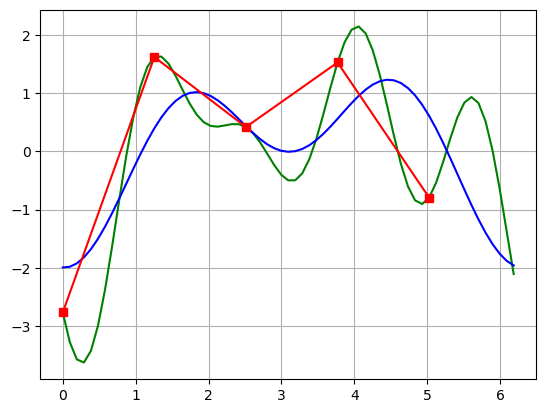

In [40]:
phase = np.random.rand(4)*2*np.pi
#phase = np.zeros(4)

def f(x):
    return np.sin(x + phase[0]) + np.sin(2*x + phase[1]) + np.sin(3*x + phase[2]) + np.sin(4*x + phase[3])

def g(x):
    return np.sin(x + phase[0]) + np.sin(2*x + phase[1])

def proj(x,Nx,dx,freq_max):
    freqs = np.fft.fftfreq(Nx,dx)*2*np.pi
    freqs_filt = np.abs(freqs) <= freq_max
    print(freqs)
    print(freqs_filt)
    x_amp = np.abs(np.fft.fft(x))*freqs_filt
    x_pha = np.angle(np.fft.fft(x))*freqs_filt
    return np.real(np.fft.ifft(x_amp * np.exp(1j * x_pha)))
    

plt.plot(xspace2,f(xspace2),'-g',xspace2,g(xspace2),'-b')
plt.plot(xspace,f(xspace),'rs-')
#plt.plot(xspace,proj(f(xspace),Nx,dx,2),'x--')
plt.grid()

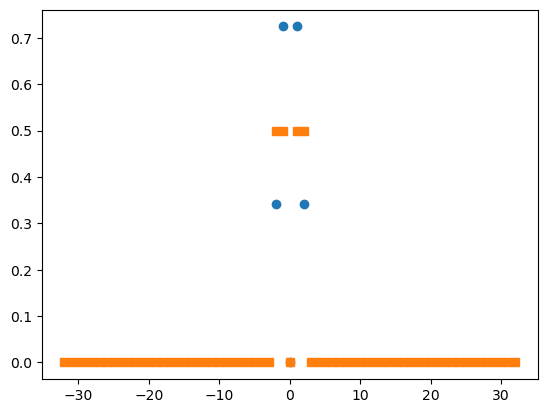

In [29]:
#plt.plot(np.fft.fftfreq(Nx2,dx2)*2*np.pi, np.abs(np.fft.fft(f(xspace2)))/Nx2,'db')
plt.plot(np.fft.fftfreq(Nx,dx)*2*np.pi, np.abs(np.fft.fft(f(xspace)))/Nx,'o')
plt.plot(np.fft.fftfreq(Nx2,dx2)*2*np.pi, np.abs(np.fft.fft(g(xspace2)))/Nx2,'s')

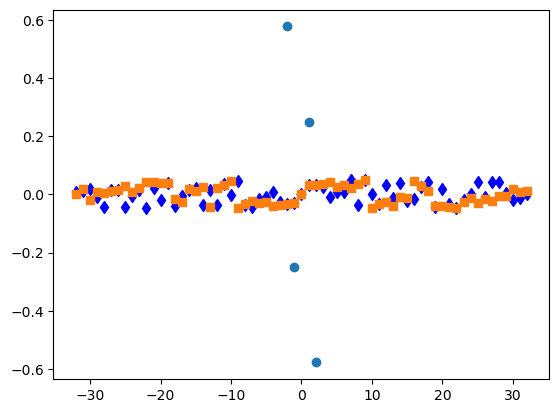

In [30]:
plt.plot(np.fft.fftfreq(Nx2,dx2)*2*np.pi, np.angle(np.fft.fft(f(xspace2)))/Nx2,'db')
plt.plot(np.fft.fftfreq(Nx,dx)*2*np.pi, np.angle(np.fft.fft(f(xspace)))/Nx,'o')
plt.plot(np.fft.fftfreq(Nx2,dx2)*2*np.pi, np.angle(np.fft.fft(g(xspace2)))/Nx2,'s')

In [248]:
amplitudes = np.abs(np.fft.fft(g(xspace2)))
phases = np.unwrap(-np.angle(np.fft.fft(g(xspace2))))
frequences = np.fft.fftfreq(Nx2,dx2)*2*np.pi

In [256]:
phases

array([-0.        ,  1.57079633,  1.0187479 ,  0.97466754,  0.52069306,
        0.15304454, -0.57325965,  0.        ,  0.        ,  0.        ,
        0.57325965, -0.11927607, -0.52069306, -0.98534184, -1.0187479 ,
       -1.57079633])

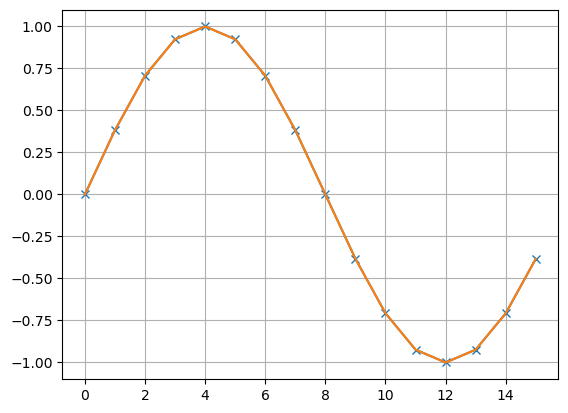

In [262]:
plt.plot(g(xspace2),'x-')
plt.plot(np.real(np.fft.ifft(amplitudes * np.exp(-1j * phases))))
plt.grid()

ValueError: operands could not be broadcast together with shapes (16,) (4,) 

In [149]:
k = np.fft.fftfreq(Nx2,dx2)*2*np.pi

array([1., 2., 3., 4., 5., 6., 7.])

In [15]:
L = 2*np.pi
Nx = 5
dx = L/Nx
xspace = np.linspace(0,L-dx,Nx)

In [21]:
np.fft.fftfreq(Nx)*Nx

array([ 0.,  1.,  2., -2., -1.])

In [48]:
def getF(Nu):
    return np.exp(-1j*2*np.pi/Nu)**np.outer(np.arange(0,Nu ,1),np.arange(0,Nu ,1))

In [49]:
np.fft.fft(np.sin(xspace))

array([ 1.11022302e-16+0.00000000e+00j, -2.13945637e-16-2.50000000e+00j,
        1.58434486e-16-4.31647932e-17j,  1.58434486e-16+4.31647932e-17j,
       -2.13945637e-16+2.50000000e+00j])

In [52]:
np.linalg.norm(np.dot(getF(Nx),np.sin(xspace)) - np.fft.fft(np.sin(xspace)))

1.063563909005008e-15

In [34]:
Nu = 2
on = np.exp(-1j*2*np.pi/Nu)**np.arange(0,Nu ,1)

In [47]:
np.exp(-1j*2*np.pi/Nu)**np.outer(np.arange(0,Nu ,1),np.arange(0,Nu ,1))

array([[ 1.+0.0000000e+00j,  1.+0.0000000e+00j],
       [ 1.+0.0000000e+00j, -1.-1.2246468e-16j]])

In [33]:
getF(2)

array([[ 1.+0.0000000e+00j, -1.-1.2246468e-16j],
       [-1.-1.2246468e-16j,  1.+2.4492936e-16j]])